In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns 
from math import pi

# Data import
wimbledon_path = "./data/tennis/Wimbledon-men-2013_mod.csv"
tennis = pd.read_csv(wimbledon_path)


/var/folders/0n/jch1sc197m3fb841gmh5l6kw0000gn/T/ipykernel_4764/2184476872.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


     FNL  FSP  FSW  SSP  SSW  ACE  DBF  WNR  UFE  BPC  BPW  NPA  NPW  ST1  \
0      0   59   29   41   14    5  1.0   26   18    5    1   28   19    4   
1      1   62   77   38   35   18  4.0   60   28   13    1   27   19    7   
2      3   72   44   28   10   17  3.0   41   18    8    5   26   17    6   
3      3   77   40   23   12    6  0.0   25   11   14    5   14   11    6   
4      0   68   61   32   15    7  2.0   32   29    2    0   29   20    4   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
223    3   72   55   28   11   12  0.0   42   11    8    3   21   17    6   
224    0   53   33   47   27    6  4.0   31   25    2    2   31   21    6   
225    3   70   60   30   24   20  1.0   49   15   13    5   36   22    6   
226    2   60   82   40   42    4  4.0   48   37    7    2   37   25    5   
227    3   64   48   36   16    9  2.0   36   21   17    7   37   26    6   

     ST2  ST3  ST4  ST5  
0      3    2  NaN  NaN  
1      4    6  6.0  NaN

/var/folders/0n/jch1sc197m3fb841gmh5l6kw0000gn/T/ipykernel_4764/3609210696.py:19: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



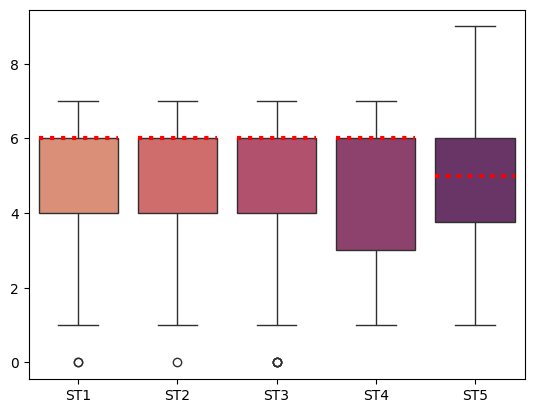

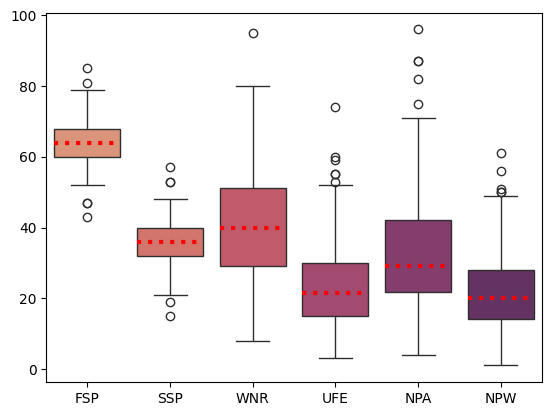

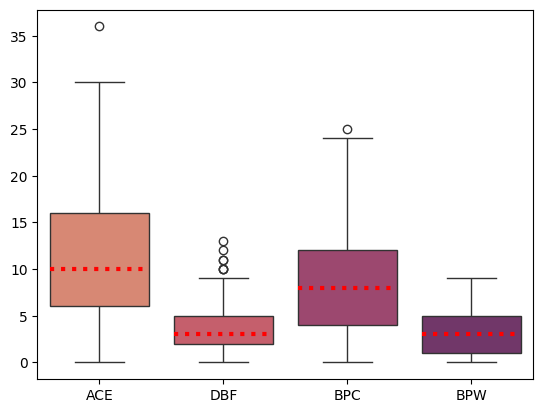

In [10]:
# For summary statistics it doesnt really matter if something was done by player one or two 
# Creating new dataframe with attributes of both players in one colummn
tennis1 = tennis.drop(columns=['Player1','Player2','Round','Result','FNL.2','FSP.2','FSW.2','SSP.2','SSW.2','ACE.2','DBF.2', \
                               'WNR.2','UFE.2','BPC.2','BPW.2','NPA.2','NPW.2','TPW.2','TPW.1','ST1.2','ST2.2','ST3.2','ST4.2','ST5.2'])

tennis2 = tennis.drop(columns=['Player1','Player2','Round','Result','FNL.1', 'FSP.1','FSW.1','SSP.1','SSW.1','ACE.1','DBF.1', \
                               'WNR.1','UFE.1','BPC.1','BPW.1','NPA.1','NPW.1','TPW.1','TPW.2','ST1.1','ST2.1','ST3.1','ST4.1','ST5.1'])

tennis2.index = tennis1.index
tennis2.columns = tennis1.columns
tennis12 = pd.concat([tennis1.reset_index(drop=True), tennis2.reset_index(drop=True)], axis= 0, ignore_index = True)
tennis12 = tennis12.rename(columns={'FNL.1':'FNL','FSP.1':'FSP','FSW.1':'FSW','SSP.1':'SSP','SSW.1':'SSW','ACE.1':'ACE','DBF.1':'DBF', \
                               'WNR.1':'WNR','UFE.1':'UFE','BPC.1':'BPC','BPW.1':'BPW','NPA.1':'NPA','NPW.1':'NPW','ST1.1':'ST1', \
                                'ST2.1':'ST2','ST3.1':'ST3','ST4.1':'ST4','ST5.1':'ST5'})
tennis12 = tennis12.replace('NA    ', np.nan)
# replace field that's entirely space (or empty) with NaN
tennis12 = tennis12.replace(r'^\s*$', np.nan, regex=True)

tennis12 = tennis12.apply(pd.to_numeric, errors='ignore')
print(tennis12)

# Plot 
sns.set(font_scale = 1.3)
sns.boxplot(data=tennis12[["ST1","ST2","ST3","ST4","ST5"]], palette='flare', medianprops={'color': 'red', 'ls': ':', 'lw': 3}).set_ylabel('Set score [-]')
plt.savefig("boxplot1", dpi = 1000)
plt.show()

sns.boxplot(data=tennis12[["FSP","SSP"]], palette='flare', medianprops={'color': 'red', 'ls': ':', 'lw': 3}).set(ylabel='Percentage of serves won [%]')
plt.savefig("boxplot2", dpi = 1000)
plt.show()

sns.boxplot(data=tennis12[["FSW","SSW","ACE","WNR", "BPW", "NPW"]], palette='flare', medianprops={'color': 'red', 'ls': ':', 'lw': 3}).set(ylabel='Times won [-]')
plt.savefig("boxplot3", dpi = 1000)
plt.show()

sns.boxplot(data=tennis12[["DBF","UFE", "BPC", "NPA" ]], palette='flare', medianprops={'color': 'red', 'ls': ':', 'lw': 3}).set(ylabel='Errors commited or points attempted [-]')
plt.savefig("boxplot4", dpi = 1000)
plt.show()

In [3]:
print(tennis12.describe())

# Put in latex document when we already have pictures??

              FNL         FSP         FSW         SSP         SSW         ACE  \
count  228.000000  228.000000  228.000000  228.000000  228.000000  228.000000   
mean     1.771930   64.100877   52.526316   35.899123   20.710526   11.219298   
std      1.327679    6.380960   16.640120    6.380960    7.498280    6.861447   
min      0.000000   43.000000   12.000000   15.000000    3.000000    0.000000   
25%      0.000000   60.000000   40.750000   32.000000   16.000000    6.000000   
50%      2.000000   64.000000   49.000000   36.000000   20.000000   10.000000   
75%      3.000000   68.000000   63.000000   40.000000   25.000000   16.000000   
max      3.000000   85.000000  102.000000   57.000000   47.000000   36.000000   

              DBF         WNR         UFE         BPC         BPW         NPA  \
count  226.000000  228.000000  228.000000  228.000000  228.000000  228.000000   
mean     3.451327   40.771930   23.951754    8.289474    2.828947   32.513158   
std      2.456705   14.9147

In [4]:
# Create statistics based on individual player results

def player_stats(name):
    player = pd.DataFrame(columns=('FNL','FSP','FSW','SSP','SSW','ACE','DBF', 'WNR','UFE','BPC','BPW','NPA','NPW','TPW','ST1', \
                               'ST2','ST3','ST4','ST5'))
    for index, row in tennis.iterrows():
        if(row["Player1"]==name):
            roww = row.tolist()
            roww = roww[4:24]
            del roww[1]
            print(roww)
            player.loc[len(player)] = roww
        if(row["Player2"]==name):
            roww = row.tolist()
            roww = roww[24:42]
            roww.insert(0, row.to_list()[5])
            print(roww)
            player.loc[len(player)] = roww
    return(player)


players = ['A.Murray','J.Janowicz','J.DelPotro','N.Djokovic']
FNL = list()
FSP = list()
FSW = list()
SSP = list()
SSW = list()
ACE = list()
DBF = list()
WNR = list()
UFE = list()
BPC = list()
BPW = list()
NPA = list()
NPW = list()
TPW = list()

for i in players:
    df = player_stats(i)
    FNL.append(df["FNL"].mean())
    #FSP.1                 First Serve Percentage for player 1 (Real Number)
    FSP.append(df["FSP"].mean())
    #FSW.1                 First Serve Won by player 1 (Real Number)
    FSW.append(df["FSW"].mean())
    #SSP.1                 Second Serve Percentage for player 1 (Real Number)
    SSP.append(df["SSP"].mean())
    #SSW.1                 Second Serve Won by player 1 (Real Number)
    SSW.append(df["SSW"].mean())
    #ACE.1                 Aces won by player 1 (Numeric-Integer)
    ACE.append(df["ACE"].mean())
    #DBF.1                 Double Faults committed by player 1 (Numeric-Integer)
    DBF.append(df["DBF"].mean())
    #WNR.1                 Winners earned by player 1 (Numeric)
    WNR.append(df["WNR"].mean())
    #UFE.1                 Unforced Errors committed by player 1 (Numeric)
    UFE.append(df["UFE"].mean())
    #BPC.1                 Break Points Created by player 1   (Numeric)
    BPC.append(df["BPC"].mean())
    #BPW.1                 Break Points Won by player 1    (Numeric) 
    BPW.append(df["BPW"].mean())
    #NPA.1                 Net Points Attempted by player 1 (Numeric)
    NPA.append(df["NPA"].mean())
    #NPW.1                 Net Points Won by player 1  (Numeric)
    NPW.append(df["NPW"].mean())
    #TPW.1                 Total Points Won by player 1 (Numeric)
    TPW.append(df["TPW"].mean())     
    #print(df.describe())


[3, 57, 39, 43, 20, 11, 2.0, 38, 16, 10, 5, 23, 17, nan, 6, 6, 6, nan, nan]
[3, 63, 44, 37, 20, 11, 1.0, 41, 14, 15, 4, 23, 19, nan, 6, 6, 7, nan, nan]
[3, 65, 44, 35, 16, 9, 0.0, 40, 14, 7, 5, 28, 20, nan, 6, 6, 7, nan, nan]
[3, 63, 55, 37, 16, 15, 4.0, 45, 16, 10, 5, 42, 31, nan, 6, 7, 6, nan, nan]
[3, 69, 72, 31, 23, 14, 3.0, 36, 27, 11, 5, 31, 22, nan, 4, 3, 6, 6.0, 7.0]
[3, 70, 60, 30, 24, 20, 1.0, 49, 15, 13, 5, 36, 22, nan, 6, 6, 6, 6.0, nan]
[3, 64, 48, 36, 16, 9, 2.0, 36, 21, 17, 7, 37, 26, nan, 6, 7, 6, nan, nan]
[3, 68, 40, 32, 17, 11, 4.0, 39, 17, 21, 5, 17, 11, nan, 6, 6, 6, nan, nan]
[3, 69, 52, 31, 16, 30, 3.0, 59, 15, 5, 3, 15, 14, nan, 7, 6, 6, nan, nan]
[3, 57, 68, 43, 36, 16, 8.0, 54, 26, 9, 3, 42, 28, nan, 3, 7, 6, 4.0, 6.0]
[3, 68, 63, 32, 12, 30, 9.0, 58, 14, 10, 3, 16, 12, nan, 7, 6, 6, nan, nan]
[1, 55, 54, 45, 27, 9, 11.0, 43, 43, 7, 1, 51, 32, nan, 7, 4, 4, 3.0, nan]
[3, 73, 45, 27, 12, 10, 1.0, 34, 10, 8, 6, 11, 9, nan, 6, 7, 6, nan, nan]
[3, 69, 46, 31, 16, 

In [5]:
import plotly.express as px
import plotly.graph_objects as go
#players = ['A.Murray','J.Janowicz','J.DelPotro','N.Djokovic']
df = pd.DataFrame({'FNL':FNL,'DBF':DBF,'BPW':BPW, 'FNL2':FNL})
fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        theta=['FNL','DBF','BPW', 'FNL'],
        r=df.iloc[0],
        name='A.Murray'
    ))

fig.add_trace(
    go.Scatterpolar(
        theta=['FNL','DBF','BPW', 'FNL'],
        r=df.iloc[1],
        name='J.Janowicz'
    ))

fig.add_trace(
    go.Scatterpolar(
        theta=['FNL','DBF','BPW', 'FNL'],
        r=df.iloc[2],
        name='J.DelPotro'
    ))

fig.add_trace(
    go.Scatterpolar(
        theta=['FNL','DBF','BPW', 'FNL'],
        r=df.iloc[3],
        name='N.Djokovic'
    ))

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.update_layout(
    font=dict(
        #family="Courier New, monospace",
        size=18,  # Set the font size here
        #color="RebeccaPurple"
    )
)


fig.write_image("player1.png", scale=3) 
#fig.update_layout( legend_orientation='h',legend_xanchor="center", legend_yanchor="bottom")
#plt.show()
#plt.savefig("players1", dpi = 1000)


In [6]:


#players = ['A.Murray','J.Janowicz','J.DelPotro','N.Djokovic']
df = pd.DataFrame({'FSP':FSP,'FSW':FSW, 'WNR':WNR, 'SSP':SSP, 'FSP2':FSP})
fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        theta=['FSP','FSW', 'WNR', 'SSP', 'FSP'],
        r=df.iloc[0],
        name='A.Murray'
    ))

fig.add_trace(
    go.Scatterpolar(
        theta=['FSP','FSW', 'WNR', 'SSP', 'FSP'],
        r=df.iloc[1],
        name='J.Janowicz'
    ))

fig.add_trace(
    go.Scatterpolar(
        theta=['FSP','FSW', 'WNR', 'SSP', 'FSP'],
        r=df.iloc[2],
        name='J.DelPotro'
    ))

fig.add_trace(
    go.Scatterpolar(
        theta=['FSP','FSW', 'WNR', 'SSP', 'FSP'],
        r=df.iloc[3],
        name='N.Djokovic'
    ))

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.update_layout(
    font=dict(
        #family="Courier New, monospace",
        size=18,  # Set the font size here
        #color="RebeccaPurple"
    )
)

fig.write_image("player2.png", scale=3) 

In [7]:
df = pd.DataFrame({'NPW':NPW,'SSW':SSW, 'ACE':ACE,'UFE':UFE, 'NPW2':NPW})
fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        theta=['NPW','SSW', 'ACE','UFE', 'NPW'],
        r=df.iloc[0],
        name='A.Murray'
    ))

fig.add_trace(
    go.Scatterpolar(
        theta=['NPW','SSW', 'ACE','UFE', 'NPW'],
        r=df.iloc[1],
        name='J.Janowicz'
    ))

fig.add_trace(
    go.Scatterpolar(
        theta=['NPW','SSW', 'ACE','UFE', 'NPW'],
        r=df.iloc[2],
        name='J.DelPotro'
    ))

fig.add_trace(
    go.Scatterpolar(
        theta=['NPW','SSW', 'ACE','UFE', 'NPW'],
        r=df.iloc[3],
        name='N.Djokovic'
    ))

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.update_layout(
    font=dict(
        #family="Courier New, monospace",
        size=18,  # Set the font size here
        #color="RebeccaPurple"
    )
)

fig.write_image("player3.png", scale=3) 
